#### 1.6.6 Statistics and random numbers
- 용어 정의
    - 확률 변수 (random variable)
        - 동전 던지기: tail=0, head=1
        - 주사위 던지기: random variable= 눈의 수
    - 확률 과정 (random process): 시간적 확률 실헝 결과 확률 변수의 시퀀스
        - 주사위를 1000번 던진다.
        - 주사위를 1000개 던진다.
- scipy.stats 모듈: 통계 및 랜덤 프로세스의 툴을 제공
- numpy.random 모듈: 여러 가지 랜덤 프로세스의 랜덤 수 생성기 제공
#### 1.6.6.1 Distribution: histogram and probability density function
- 랜덤 프로세스의 관측이 주어지면, 그의 히스토그램은 랜덤프로세스의 probability density function (pdf) 의 추정이다.
- 히스토그램을 그리기 위하여 bin을 정의해야 함.
    - 각 bin은 interval이지만 numpy.histogram에는 bin의 edge를 넣는다. bin 이 너무 크거나 작지 않게 한다.
    - ex) $bins=[b_0,b_1,b_2,b_3] \rightarrow intervals: b_0\le I_0< b_1 ,b_1\le I_1 < b_2, b_2\le I_3 \color{red}\le \color{black}b_3$

<BarContainer object of 2 artists>

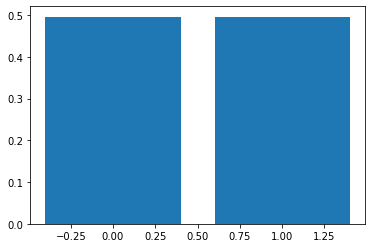

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 랜덤프로세스 관측의 예: 동전 던지기 (랜덤변수: tail=0, head=1)
# 실험할 때 마다 매번 달라질 수 있다.
samples = np.random.randint(0,2,1000)
histo = np.histogram(samples,bins=np.arange(-0.5, 1.5, 1))
plt.bar(np.arange(0,2),histo[0]/len(samples))

In [2]:
#seed를 넣으면 항상 같은 random sequence를 제공한다.
f=open('random.txt','a')
np.random.seed(13)
samps=np.random.randint(1,6,10)
print(samps)
vstr=''
for idx, val in enumerate(samps):
    vstr += str(val)
    if idx == len(samps)-1: vstr += '\n'
    else: vstr += ','
f.write(vstr)
f.close()

[3 1 3 1 3 5 2 5 3 4]


<BarContainer object of 6 artists>

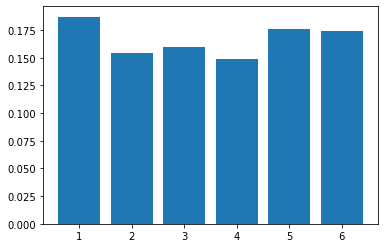

In [2]:
# 랜덤 프로세스 관측의 예: 주사위 실험 (랜덤변수: 눈의 수)
# 실험할 때마다 매번 달라 질 수 있다.'

samples = np.random.randint(1,7,1000)
histo= np.histogram(samples,bins=np.arange(0.5,6.6,1))
plt.bar(np.arange(1,7),histo[0]/len(samples))

<BarContainer object of 4 artists>

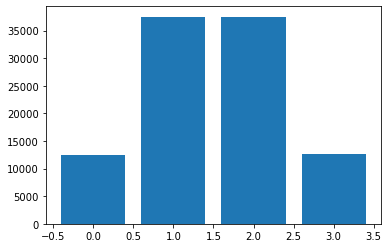

In [25]:
# 랜덤프로세스 관측의 예: 동전 3개 던지기 실험 (랜덤변수: head의 수)
noExp = 1000
np.random.seed(13)
htsamples=np.random.randint(0,2,300000)
samples=htsamples[::3]+htsamples[1::3]+htsamples[2::3]
histo = np.histogram(samples,bins=np.arange(-0.5,3.6,1))
plt.bar(np.arange(0,4),histo[0])

**정규분포**
- 정규분포 (normal distribution) 은 Gauss 분포라고도 함 (Gaussian distrubtion)
- 대부분이 정규분포를 따름: 한국인의 평균키, 몸무게, 성적분포, ...
- 정규분포는 평균과 표준편차만 알면 정확히 분포를 알 수 있다.
- 모집단의 평균과 표준편차의 추정은 표본평균과 표본표준편차로 추정한다. 
    - 모집단의 평균과 표준편차: $\mu , \sigma$
    - 표본의 평균과 표준편차: 
    $$\bar{x}=\frac{\sum{x_i}}{N}$$
    $$s=\sqrt{\frac{\sum{(x_i-\bar{x})^2}}{N}}$$

In [3]:
# 랜덤 프로세스의 관측의 예: 정규분포
samples = np.random.normal(size=1000)
bins = np.arange(-4, 5)
bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

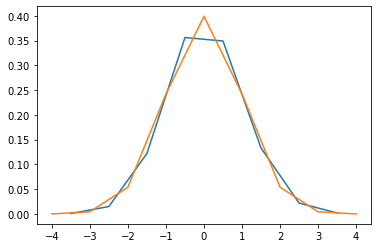

In [4]:
# histogram을 구한다.
#density-True 이면 hitogram을 전체 sample수로 나눈다.
histogram = np.histogram(samples, bins=bins, density=True)[0] 

# histogram을 그리기 위해 bin center를 구한다.
bcnts = 0.5*(bins[1:] + bins[:-1])
import matplotlib.pyplot as plt
plt.plot(bcnts, histogram) 

# normal 분포와 비교해 보기 위해서 normal 분포를 그려본다
from scipy import stats
pdf = stats.norm.pdf(bins)  # norm is a distribution object
plt.plot(bins, pdf) 

- 한편 scipy.stat 모듈에서는 랜덤프로세스의 확률분포를 안다면 랜덤프로세스를 확률분포에 fitting 하는 함수를 제공한다.

In [5]:
loc, std = stats.norm.fit(samples) #loc=0, std=1 이 예상됨
print(f'loc={loc}, std={std}')     

loc=0.029622938051342248, std=0.9703275480928554


In [6]:
# sample로부터 확률 분포의 추정: numpy.mean, numpy.std 만으로 pdf의 추정이 가능하다.
samples = np.random.normal(size=100)
histogram = np.histogram(samples, bins=bins, density=True)[0]
loc, std = stats.norm.fit(samples)
m=np.mean(samples)
s=np.std(samples)
print('loc,std',loc,std)
print('m,s',m,s)

loc,std -0.06286119437854719 0.9466190593021137
m,s -0.06286119437854719 0.9466190593021137


**도수분포표 으로부터 추정**
|x|	f|	fx|
|--|--|--|
|1|	15|	15|
|2|	27|	54|
|3|	8|	24|
|4|	5|	20|
|TOTALS|	55|	113|

$$\bar{x}=\frac{\sum{xf}}{\sum{f}}$$
$$s=\sqrt{\frac{\sum{(x-\bar{x})^2f}}{\sum{f}}}$$

In [42]:
# 상기 도수분포표의 mean, std
x=np.array([1,2,3,4])
f=np.array([15,27,8,5])
m=np.sum(x*f)/np.sum(f)
var=np.sum((x-m)**2*f)/np.sum(f)
print(m,np.sqrt(var))
# numpy 함수를 이용하기 위하여 repeat를 이용하여 표본을 복원한다.
samples=np.repeat(x,f)
print(samples.mean(),samples.std())

2.0545454545454547 0.882520807237207
2.0545454545454547 0.8825208072372072


In [40]:
samples=np.repeat(x,f)
print(samples.mean(),samples.std())

2.0545454545454547 0.8825208072372072


#### 정규분포표의 이용
- 표준점수
$$z=\frac{x-\mu}{\sigma}$$
- cdf (cumulative distribution function)
$$cdf(z)=\int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}}e^{\frac{x^2}{2}}dx$$
- ppf(percent point function, or quantiel function)  
$ppf(q)$는$\int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}}e^{\frac{x^2}{2}}dx=q$를 만족하는 $z$


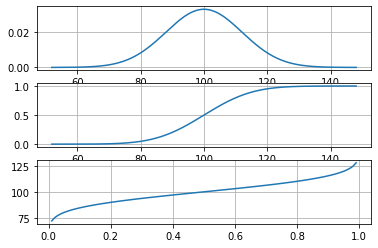

In [15]:
m,s=100,12
ndist=stats.norm(loc=m,scale=s)
x=np.linspace(m-4*s,m+4*s,1000)
pdf = ndist.pdf(x) #probability distribution
cdf=ndist.cdf(x) #cumulative distribution
ppf=ndist.ppf(pcnt) # percent point function
plt.subplot(311)
plt.plot(x,pdf)
plt.grid()
plt.subplot(312)
plt.plot(x,cdf)
plt.grid()
pcnt=np.linspace(0,1,100)
plt.subplot(313)
plt.plot(pcnt,ppf)
plt.grid()

#### example
- 다음은 A 회사의 두루마리 화장지의 100개 sample 조사이다.

|길이 (m)| 빈도수|
|--|--|
|68| 15|
|69| 25|
|70| 40|
|71| 15|
|72| 5|

- 이 회사의 화장지 길이가 정규분포라고 가정했을 때 다음에 답하여라
    1. 화장지를 샀을 때 길이가 71m보다 클 확률은?
    2. 화장지의 길이가 가장 긴 5%에 들어가려면 몇 m보다 커야 하는가?


In [43]:
x=np.array([68,69,70,71,72])
f=np.array([15,25,40,15,5])
samples=np.repeat(x,f)
m=samples.mean()
s=samples.std()
print(m,s)
dist=stats.norm(loc=m,scale=s)
print(dist.ppf(0.95))

69.7 1.0535653752852738
71.43296082876847


**20~24 한국인 남자 다리 가쪽 길이**  
bins: 938,979,1021,1063,1105,1146,1188   
frqs: 12,77,262,264,131,43

- 롱다리 1%안에 들어가려면 몇 mm 이상이어야 하는가?

In [44]:
bins=np.array([938,979,1021,1063,1105,1146,1188])
frqs=np.array([12,77,262,264,131,43])
x=(bins[1:]+bins[:-1])/2
samples=np.repeat(x,frqs)
m=samples.mean()
s=samples.std()
dist=stats.norm(loc=m,scale=s)
print(dist.ppf(0.95))

1145.2062985651078


#### 1.6.6.2 Mean, median, and percentile
- np.mean: 평균
- np.median: 중앙값
- stats.scoreatpercentile(samples,p): 그 아래로 samples의 전체 p%가 들어 있는 값
    - ppf의 estimator이다.

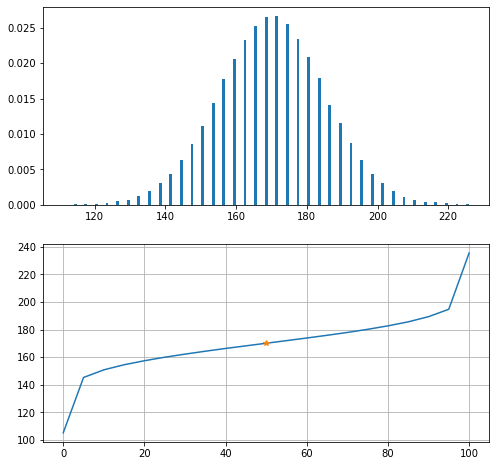

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
m=170
s=15
samples = np.random.normal(loc=m,scale=s,size=100000)
bins=np.arange(m-4*s,m+4*s,s/5)
hist=np.histogram(samples,bins=bins,density=True)
x=(bins[:-1]+bins[1:])/2
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.bar(x,hist[0])
pcnt = np.arange(0,101,5)
percentiles = stats.scoreatpercentile(samples,pcnt)
plt.subplot(212)
plt.plot(pcnt,percentiles)
plt.grid()
median = stats.scoreatpercentile(samples,50)
plt.plot(50,median,'*')

#### Gamma distribution
- 감마함수는 factorial의 실수로의 extension이다.
- pdf 는 
$$f(x,\alpha,\beta)=\frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma (\alpha)}$$
- $\alpha = 1$이면 지수분포이다
- $\alpha$번째 사건이 일어날 때 까지 걸리는 시간에 대한 연속 확률분포이다 (Poisson events).  
- 상담센터, 은행, networking
- 만일 상담센터 opening까지의 시간이 $\mu$라면 다음과 같은 분포를 갖는다.
$$f(x,\alpha,\beta,\mu)=\frac{\beta^{\alpha}(x-\mu )^{\alpha-1}e^{-\beta (x-\mu )}}{\Gamma (\alpha)},
x\ge \mu$$
- stats.gamma는 $\beta=1$인 분포만을 지원한다.
$$f(x,\alpha )=x^{\alpha -1}e^{-x}$$

- $\alpha , \beta , \mu$를 전부 지원하는 분포 함수를 얻기 위하여 $y=(x-\mu )\beta$의 pdf를 구하면 된다.
- 즉 $stats.gamma(\alpha ).pdf(y)$
- $\beta$는 scale 혹은 standard deviation의 역수와 관계가 있다 ($\beta = 1/scale$)

- stats.gamma.fit는 $\alpha , \mu , scale$를 return한다

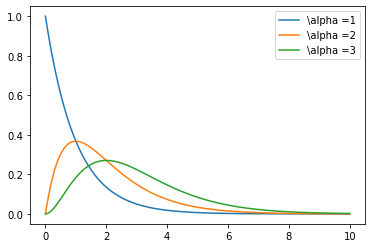

In [70]:
# shape parameter
x=np.linspace(0,10,100)
plt.plot(x,stats.gamma(1).pdf(x),label=r'\alpha =1') #문 열기 전에 줄서 있음
plt.plot(x,stats.gamma(2).pdf(x),label=r'\alpha =2')
plt.plot(x,stats.gamma(3).pdf(x),label=r'\alpha =3') #느긋하게 방문
plt.legend()

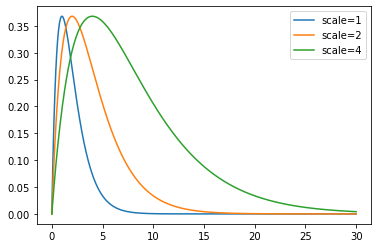

In [99]:
# scale parameter (alpha=2)
x=np.linspace(0,30,1000)
plt.plot(x,stats.gamma(2).pdf(x/1),label='scale=1')
plt.plot(x,stats.gamma(2).pdf(x/2),label='scale=2')
plt.plot(x,stats.gamma(2).pdf(x/4),label='scale=4')
plt.legend()

#### Exercise: Probability distribution
- generate 1000 gamma (shape=1) samples
- plot histogram
- plot pdf on top
- recover shape parameter



#### Exercise: compare mean and median on samples of a gamma distribution

[0.5391982  1.58886993 2.63854165 3.68821338 4.7378851  5.78755683
 6.83722856 7.88690028 8.93657201 9.98624374]


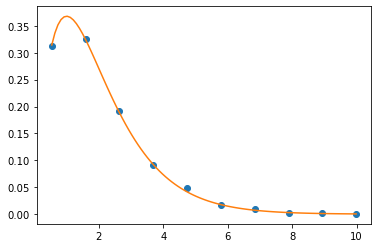

In [94]:
from scipy import stats
# gamma 랜덤프로세스 samples
alpha=2
samples = np.random.gamma(shape=alpha,size=1000)
hist = np.histogram(samples) #histogram[1]은 bin edge, histogram[0]은 각 bin의 frequency
x=(hist[1][1:]+hist[1][:-1])/2
print(x)

plt.plot(x,hist[0]/np.sum(hist[0]),'o')
xs = np.linspace(np.min(x),np.max(x),100)
pdf = stats.gamma.pdf(xs,alpha)
plt.plot(xs,pdf)

In [95]:
#recover shape param
a, loc, scale = stats.gamma.fit(samples)
print(a, loc, scale)

1.8589581934109989 -0.00880035641527177 1.0573094179002225


- gamma.pdf(x,a,loc,scale)은 
- gamma.pdf(y,a), y=(x-loc)/scale

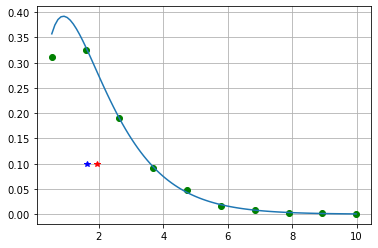

In [96]:
x=(hist[1][1:]+hist[1][:-1])/2
y=hist[0]/np.sum(hist[0])
plt.plot(x,y,'go')
xs = np.linspace(np.min(x),np.max(x),100)
ys=(xs-loc)/scale
pdf = stats.gamma.pdf(ys,a)
plt.plot(xs,pdf)
smean=np.mean(samples)
smedian=np.median(samples)
plt.plot(smean,0.1,'r*')
plt.plot(smedian,0.1,'b*')
plt.grid()

In [100]:
# gamma distribution의 50% percentile은 median이다.
print(smean,smedian)
stats.scoreatpercentile(samples,50)

1.95669546669105 1.64528318907757


1.64528318907757

#### 1.6.6.3. statistical tests
- 통계적 검정
- T-test (student t-test, t-검정)
    - 표본이 독립적이어야 한다. (실험군과 대조군이 서로 영향을 받지 않아야 한다)
    - 표본이 정규분포를 가정할 수 있어야 한다.
    - 표본군은 2개 이어야 한다.
    - 귀무가설(null hypothesis, $H_0$):  두 표본의 평균은 같다. (P가 아주 작은 경우 귀무가설 기각)
    - 대립가설(alternative hypothesis, $H_1$): 두 표본의 평균은 다르다.
- $t=\frac{\bar{X}-\mu}{\frac{S}{\sqrt{n}}}$, $\bar{X}$: 두집단 차이의 평균, $\mu$: 모집단의 평균, $S$: 두집단 차이의 표준편차
- stats.ttest_ind는 t-value와 p를 return한다. $p<\alpha$ 이면 차이가 있다. (ex, 유의수준 0.05 일 때 p=0.01 이면 차이가 있다.)

0.31001904675067093 0.31100748996343136
0.7567631626197979 1.2434535277544319


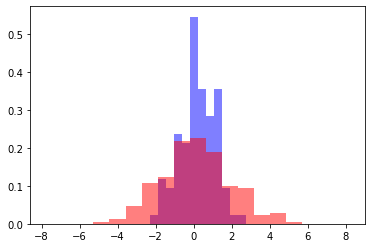

In [38]:
# p-value example
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
ma,sa=0,1
a = np.random.normal(ma, sa, size=100)
bins=np.linspace(ma-4*sa,ma+4*sa,20)
hista, bina = np.histogram(a,bins=bins,density=True) 
mb,sb=0.2,2
b = np.random.normal(mb, sb, size=200)
bins=np.linspace(mb-4*sb,mb+4*sb,20)
histb, binb = np.histogram(a,bins=bins,density=True) 
plt.hist(a,bins=bina,density=True,alpha=0.5,color='b')
plt.hist(b,bins=binb,density=True,alpha=0.5,color='r')

# a test for the null hypothesis that 2 independent samples have identical average
tval, pval=stats.ttest_ind(a, b)   
m1=np.mean(a)
s1=np.std(a)
n1=len(a)
m2=np.mean(b)
s2=np.std(b)
n2=len(b)
diff=m1-m2
spooled = np.std(np.concatenate((a,b)))
t=diff/(spooled*np.sqrt(1/n1+1/n2))
print(tval,t)
pv = stats.norm.cdf(tval)
print(pval, pv)


---
**quiz 5번** 실습  

---

#### 1.6.7 Numerical integration
#### 1.6.7.1 Function integral
- scipy.integrate.quad(): Fortran library QUADPACK 사용함.
- float array를 비교하기 위한 함수: numpy.allclose(a,b,atol,rtol), True if $|a-b|\le atol+rtol|b|$,
default atol=1e-8, rtol=1e-5
- 다른 integration 함수: fixed_qaud(), quadrature(), romber()

(3.141592653589793, 3.487868498008632e-14) 3.0375518983665146


C:\Users\kimjd\AppData\Local\Temp/ipykernel_20804/1181924817.py:19: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x,y(x),'orange')


<StemContainer object of 3 artists>

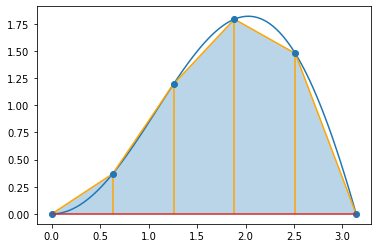

In [4]:
import numpy as np
import matplotlib.pyplot as plt

y=lambda x: x*np.sin(x)

xs=np.linspace(0,np.pi,100)
plt.plot(xs,y(xs))
# quad 이용 적분
from scipy.integrate import quad
I=quad(y,0,np.pi)
# trapezoidal approximation (사다리꼴 적분)
bins = 5
x=np.linspace(0,np.pi,bins+1)
step_size=x[1]-x[0]
It=step_size*np.sum((y(x)[:-1]+y(x)[1:])/2)
print(I,It)
plt.fill_between(x,0,y(x),alpha=0.3)
plt.plot(x,y(x),'orange')
plt.stem(x,y(x),'orange')

In [8]:
# quad로 적분한 것과 사다리꼴 근사가 error_bnd 보다 작은 bin 수는?
error_bnd = 1e-5
for bins in range(2,10000):
    x=np.linspace(0,np.pi,bins+1)
    step_size=x[1]-x[0]
    It=step_size*np.sum((y(x)[:-1]+y(x)[1:])/2)
    if np.abs(I[0]-It)<error_bnd:
        print(bins)
        break

509


---
**quiz 6번**

___